In [1]:
from openpiv import tools, pyprocess, validation, filters, scaling 
import numpy as np
import matplotlib.pyplot as plt

folder = '/home/edo20/PIV'

In [2]:
# Generate strings for the images
numbers = ["{0:03}".format(i) for i in range(1,101)]

In [3]:
# Load saveVectorField functiopon
%run -i '/home/edo20/PIV/Scripts/flash_mask.py'

In [4]:
# Initialize average field. Number contains the number of images averaged to get that value
frame = tools.imread( folder + '/Images/A' + '001' + 'a.tif' )
average_a = np.zeros_like(frame)
number_a = np.zeros_like(frame)
average_b = np.zeros_like(frame)
number_b = np.zeros_like(frame)
for i in numbers:
    # Read image
    frame_a = tools.imread( folder + '/Images/A' + str(i) + 'a.tif' )
    mask, _ = flash_mask(frame_a)
    # Sum the non flashed pixels
    average_a[mask==0] += frame_a[mask==0]
    # Store the number of pixels summed
    number_a += mask==0
    
    # Same for frame b
    frame_b = tools.imread( folder + '/Images/A' + str(i) + 'b.tif' )
    mask, _ = flash_mask(frame_b)
    # Sum the non flashed pixels
    average_b[mask==0] += frame_b[mask==0]
    # Store the number of pixels summed
    number_b += mask==0
    
# Divide each pixel for the number included in the sum
average_a = average_a/number_a
average_b = average_b/number_b


(array([106705., 100892., 100844., 104870., 100891., 101106., 104725.,
        101058., 100847.,  74030.]),
 array([0.        , 0.2628866 , 0.5257732 , 0.78865979, 1.05154639,
        1.31443299, 1.57731959, 1.84020619, 2.10309278, 2.36597938,
        2.62886598]),
 <a list of 10 Patch objects>)

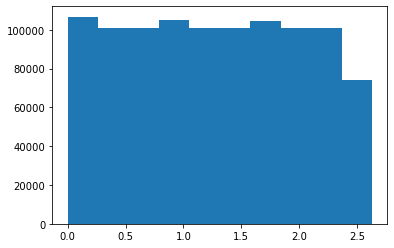

In [5]:
hist = np.histogram(average_a.flatten())
plt.hist(average_a.flatten())

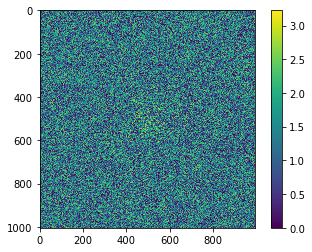

In [6]:
# Save average images
plt.imshow(average_a)
plt.imsave(folder+'/Images/average_a.tiff',average_a, format='tiff',cmap=plt.cm.gray, vmin=0, vmax=255)
plt.imshow(average_b)
plt.imsave(folder+'/Images/average_b.tiff',average_b, format='tiff',cmap=plt.cm.gray, vmin=0, vmax=255)

plt.imshow(average_b)
plt.colorbar()

# Save numpy arrays
np.save(folder+'/Images/ImagesMinusAverage/average_a',average_a)
np.save(folder+'/Images/ImagesMinusAverage/average_b',average_b)
np.save(folder+'/Images/ImagesMinusAverage/number_a',number_a)
np.save(folder+'/Images/ImagesMinusAverage/number_b',number_b)

In [7]:
# Save images minus average
for i in numbers:
    frame_a = tools.imread( folder + '/Images/A' + str(i) + 'a.tif' )
    frame_a = frame_a - average_a
    frame_a[frame_a<0] = 0
    frame_b = tools.imread( folder + '/Images/A' + str(i) + 'b.tif' )
    frame_b = frame_b - average_b
    frame_b[frame_b<0] = 0
    plt.imsave(folder + '/Images/ImagesMinusAverage/A' + str(i) + 'a.tif',frame_a, format='tiff',cmap=plt.cm.gray, vmin=0, vmax=255)
    plt.imsave(folder + '/Images/ImagesMinusAverage/A' + str(i) + 'b.tif',frame_b, format='tiff',cmap=plt.cm.gray, vmin=0, vmax=255)
    np.save(folder+'/Images/ImagesMinusAverage/A' + str(i) + 'a', frame_a)
    np.save(folder+'/Images/ImagesMinusAverage/A' + str(i) + 'b', frame_b)